# 01 - Introdução a SuperComputação

Como vimos na expositiva, uma solução de alto desempenho depende de três partes:

1. algoritmos eficientes
2. implementações eficientes
3. paralelismo

Na atividade de hoje vamos estudar o primeiro ponto e quantificar o efeito de algoritmos eficientes na resolução de um problema complexo. 

## Problemas estudados em SuperComputação

Em Desafios de Programação conhecemos a classe dos problemas NP-completo, que são aqueles que acreditamos não existir nenhum algoritmo determinístico que os resolvem em tempo polinomial. Ou seja, são problemas importantes cuja solução é difícil. Em geral temos classes de algoritmos para resolvê-los:

1. ótimos globais: algoritmo que encontra a solução "correta" do problema. 
2. ótimos locais: algoritmo que encontra uma solução "boa" e que não pode ser melhorada por pequenas modificações. 
3. aproximação: algoritmos que garantem estar "perto o suficiente" da solução ótima. Este tipo de algoritmo não nos interessa em SuperComputação.

Iremos analisar hoje 4 executáveis que resolvem o problema do [Caixeiro Viajante](https://en.wikipedia.org/wiki/Travelling_salesman_problem). 

1. `busca-local-1` - implementação de um método de busca rápida, porém não ótima.
1. `busca-local-1-par` - implementação paralela do programa acima.
2. `busca-local-2` - implementação alternativa do mesmo método acima. Os resultados de ambos são idênticos.
2. `busca-local-2-par` - implementação paralela do programa acima.

!!! important 
    Não estamos interessados no Caixeiro Viajante em si hoje. Queremos é comparar diferentes maneiras de resolvê-lo para entendermos o papel de técnicas de SuperComputação na velocidade de processamento e nos resultados obtidos. 


## Ferramental

Realizar testes de maneira automatizada é muito importante para quantificar os efeitos de diferentes algoritmos e técnicas de paralelismo. O snippet abaixo executa 

In [5]:
!chmod 777 *

In [6]:
import subprocess
import time

with open('entradas-busca-local/in-0.txt') as f:
    start = time.perf_counter()
    proc = subprocess.run(['./busca-local-1'], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()

    print('Saída:', proc.stdout)
    print('Stderr:', proc.stderr)
    print('Tempo total(s):', end - start)

Saída: 232.234 0
3 0 4 1 2 

Stderr: 
Tempo total(s): 0.015458656000021165


Vamos agora praticar usar este snippet para executar nossos testes automaticamente. 

!!! example

    Crie uma função `roda_com_entrada(executavel, arquivo_in)` que roda o primeiro argumento usando como entrada o conteúdo do segundo argumento. Teste seu código com o executável `busca-local-1` e com o arquivo de entrada `in-0.txt` usado no exemplo acima.

    Sua função deverá devolver uma tupla `(stdout,time)` com `stdout` sendo a saída do programa e `time` seu tempo de execução em segundos. 

In [28]:
# TODO: exercício aqui
import subprocess
import time
def roda_com_entrada(executavel, arquivo_in):
  with open(f'entradas-busca-local/{arquivo_in}') as f:
      start = time.perf_counter()
      proc = subprocess.run([f'./{executavel}'], input=f.read(), text=True, capture_output=True)
      end = time.perf_counter()

      print('Saída:', proc.stdout)
      print('Stderr:', proc.stderr)
      print('Tempo total(s):', end - start)

      return (proc.stdout, (end - start))




lista_arquivos = ['in-0.txt', 'in-1.txt', 'in-2.txt', 'in-3.txt', 'in-4.txt', 'in-5.txt', 'in-6.txt', 'in-7.txt', 'in-8.txt', 'in-9.txt']

lista_executaveis = ['busca-local-1', 'busca-local-1-par', 'busca-local-2', 'busca-local-2-par']



## Algoritmos sequenciais

Com esse código, vamos criar um relatório interativo que roda nossos testes automaticamente e já plota informações prontas para nossas análises. Vamos começar examinando o desempenho do executável `busca-local-1`.

!!! example

    Rode o `busca-local` com os arquivos de entrada na pasta `entradas-busca-local`. Guarde os tempos em uma lista.

!!! example

    Leia o tamanho das entradas dos arquivos  na pasta `entradas-busca-local` e guarde em uma segunda lista.

!!! example 

    Plote o tempo de execução pelo tamanho da entrada usando `matplotlib`

In [50]:
# TODO: 
lista_tempos_busca_1 = []
for i in range(len(lista_arquivos)):
  stdout, tempo = roda_com_entrada('busca-local-1', lista_arquivos[i])
  lista_tempos_busca_1.append(tempo)

lista_tempos_busca_1

Saída: 232.234 0
3 0 4 1 2 

Stderr: 
Tempo total(s): 0.012629887999992206
Saída: 220.898 0
0 5 3 8 4 7 6 1 2 9 

Stderr: 
Tempo total(s): 0.009502039000381046
Saída: 357.641 0
0 12 1 9 5 14 8 11 13 4 7 6 3 2 10 

Stderr: 
Tempo total(s): 0.009894719999920198
Saída: 384.076 0
9 11 4 10 15 16 19 12 14 17 7 1 6 18 8 13 3 5 0 2 

Stderr: 
Tempo total(s): 0.018531531000007817
Saída: 499.842 0
16 26 18 8 3 11 28 14 23 7 22 20 10 6 17 15 2 4 29 25 9 0 5 12 21 27 13 1 24 19 

Stderr: 
Tempo total(s): 0.09245533999956024
Saída: 615.722 0
22 23 16 21 39 2 6 9 38 17 35 24 11 1 29 20 26 36 31 7 0 30 18 4 25 3 10 15 27 28 8 12 33 14 32 13 19 34 37 5 

Stderr: 
Tempo total(s): 0.4343146709998109
Saída: 627.474 0
21 15 45 3 31 16 25 49 28 40 29 42 34 35 6 48 47 38 13 33 44 39 26 24 10 1 27 12 32 5 18 46 4 37 23 17 7 8 22 30 36 43 0 41 14 19 11 2 20 9 

Stderr: 
Tempo total(s): 1.4271134800001164
Saída: 713.129 0
31 37 16 5 25 40 36 48 35 23 39 17 42 41 9 7 44 47 4 58 22 38 32 6 21 11 13 8 0 29 59 3 

[0.012629887999992206,
 0.009502039000381046,
 0.009894719999920198,
 0.018531531000007817,
 0.09245533999956024,
 0.4343146709998109,
 1.4271134800001164,
 3.974432801999683,
 8.50854759699996,
 17.652011777000098]

In [51]:
lista_num_cidades = []
for i in range(len(lista_arquivos)):
  with open(f'entradas-busca-local/{lista_arquivos[i]}') as f:
    first_line = f.readline()
    lista_num_cidades.append(int(first_line))
  
lista_num_cidades

[5, 10, 15, 20, 30, 40, 50, 60, 70, 80]

!!! example
    Repita os três passos acima para o executável `busca-local-2`. Finalize plotando os tempos de execução de ambos os executáveis no mesmo gráfico.

In [52]:
#TODO: seu código aqui


lista_tempos_busca_2 = []
for i in range(len(lista_arquivos)):
  stdout, tempo = roda_com_entrada('busca-local-2', lista_arquivos[i])
  lista_tempos_busca_2.append(tempo)



Saída: 232.234 0
2 1 4 0 3 

Stderr: 
Tempo total(s): 0.022318952000205172
Saída: 220.898 0
4 7 6 1 2 9 0 5 3 8 

Stderr: 
Tempo total(s): 0.012980176999917603
Saída: 357.641 0
13 11 8 14 5 9 1 12 0 10 2 3 6 7 4 

Stderr: 
Tempo total(s): 0.011559114000192494
Saída: 384.076 0
11 4 10 15 16 19 12 14 17 7 1 6 18 8 13 3 5 0 2 9 

Stderr: 
Tempo total(s): 0.015451367999958165
Saída: 499.842 0
16 26 18 8 3 11 28 14 23 7 22 20 10 6 17 15 2 4 29 25 9 0 5 12 21 27 13 1 24 19 

Stderr: 
Tempo total(s): 0.04216702600024291
Saída: 615.722 0
22 23 16 21 39 2 6 9 38 17 35 24 11 1 29 20 26 36 31 7 0 30 18 4 25 3 10 15 27 28 8 12 33 14 32 13 19 34 37 5 

Stderr: 
Tempo total(s): 0.11439734900022813
Saída: 627.474 0
21 15 45 3 31 16 25 49 28 40 29 42 34 35 6 48 47 38 13 33 44 39 26 24 10 1 27 12 32 5 18 46 4 37 23 17 7 8 22 30 36 43 0 41 14 19 11 2 20 9 

Stderr: 
Tempo total(s): 0.30045029799975964
Saída: 713.129 0
31 37 16 5 25 40 36 48 35 23 39 17 42 41 9 7 44 47 4 58 22 38 32 6 21 11 13 8 0 29 59 

In [53]:
print("Aquiii : ", lista_tempos_busca_2)

Aquiii :  [0.022318952000205172, 0.012980176999917603, 0.011559114000192494, 0.015451367999958165, 0.04216702600024291, 0.11439734900022813, 0.30045029799975964, 0.6206231430001026, 1.9998435789998439, 2.4187135790002685]


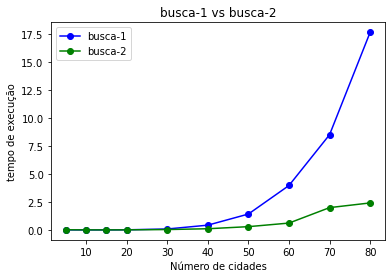

In [54]:
import matplotlib.pyplot as plt
  
# x axis values
x = lista_num_cidades
# corresponding y axis values
y1 = lista_tempos_busca_1
y2 =  lista_tempos_busca_2
  
# plotting the points 
plt.plot(x, y1, 'bo-',label='busca-1')
plt.plot(x, y2, 'go-', label='busca-2')
plt.legend()
  
# naming the x axis
plt.xlabel('Número de cidades')
# naming the y axis
plt.ylabel('tempo de execução')
  
# giving a title to my graph
plt.title('busca-1 vs busca-2')
  
# function to show the plot
plt.show()

!!! example
    Segundo uma coleta de dados informal e altamente confiável, 93,17% dos alunos não colocam legendas nem títulos nos gráficos gerados. Faça isso agora. 

!!! question medium

    Interprete o gráfico que você gerou na linha de cima. 

!!! question medium
    Compare manualmente a saída dos programas. Existe diferença em seus resultados?

!!! question medium 
    Resgate seus conhecimentos de Desafios de Programação e explique a diferença entre os algoritmos.


## Algoritmos paralelos

Na discussão inicial da expositiva chegamos à conclusão de que se conseguimos realizar *N* operações em paralelo teremos um ganho de no máximo *N* vezes no desempenho de nosso programa. Nesta parte iremos estudar esta afirmação usando implementações paralelas dos algoritmos da seção anterior. 

!!! example
    Execute os algoritmos paralelos com as mesmas entradas e compare com suas versões paralelas. Use um gráfico para facilitar as comparações

In [55]:


lista_tempos_busca_1_par = []
for i in range(len(lista_arquivos)):
  stdout, tempo = roda_com_entrada('busca-local-1-par', lista_arquivos[i])
  lista_tempos_busca_1_par.append(tempo)

lista_tempos_busca_2_par = []
for i in range(len(lista_arquivos)):
  stdout, tempo = roda_com_entrada('busca-local-2-par', lista_arquivos[i])
  lista_tempos_busca_2_par.append(tempo)

Saída: 232.234 0
3 0 4 1 2 

Stderr: 
Tempo total(s): 0.017310037000243028
Saída: 220.898 0
4 7 6 1 2 9 0 5 3 8 

Stderr: 
Tempo total(s): 0.037996686000042246
Saída: 357.641 0
0 12 1 9 5 14 8 11 13 4 7 6 3 2 10 

Stderr: 
Tempo total(s): 0.024651680999795644
Saída: 384.076 0
9 11 4 10 15 16 19 12 14 17 7 1 6 18 8 13 3 5 0 2 

Stderr: 
Tempo total(s): 0.03666260699992563
Saída: 499.842 0
16 26 18 8 3 11 28 14 23 7 22 20 10 6 17 15 2 4 29 25 9 0 5 12 21 27 13 1 24 19 

Stderr: 
Tempo total(s): 0.14594373099998847
Saída: 615.722 0
22 23 16 21 39 2 6 9 38 17 35 24 11 1 29 20 26 36 31 7 0 30 18 4 25 3 10 15 27 28 8 12 33 14 32 13 19 34 37 5 

Stderr: 
Tempo total(s): 0.41889231300001484
Saída: 627.474 0
21 15 45 3 31 16 25 49 28 40 29 42 34 35 6 48 47 38 13 33 44 39 26 24 10 1 27 12 32 5 18 46 4 37 23 17 7 8 22 30 36 43 0 41 14 19 11 2 20 9 

Stderr: 
Tempo total(s): 1.1405193799996596
Saída: 713.129 0
31 37 16 5 25 40 36 48 35 23 39 17 42 41 9 7 44 47 4 58 22 38 32 6 21 11 13 8 0 29 59 3 

!!! question medium
    Compare os tempos obtidos. Qual foi o ganho médio? Quantos *núcleos* a máquina que você está usando possui? Responda comparando cada algoritmo sequencial com sua versão paralela.

Já estabelecemos que `busca-local-2` é melhor que `busca-local-1` por ser utilizar um algoritmo mais eficiente e vimos na prática a diferença entre um algoritmo $O(n^3)$ e um algoritmo $O(n^2)$. Vamos agora examinar a seguinte questão.

!!! cite "É possível usar paralelismo para tornar `busca-local-1-par` melhor que `busca-local-2`?"

!!! example
    Compare o desempenho de `busca-local-1-par` com `busca-local-2`. Faça um gráfico

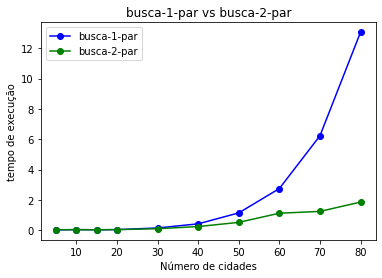

In [56]:
# x axis values
x = lista_num_cidades
# corresponding y axis values
y1 = lista_tempos_busca_1_par
y2 =  lista_tempos_busca_2_par
  
# plotting the points 
plt.plot(x, y1, 'bo-',label='busca-1-par')
plt.plot(x, y2, 'go-', label='busca-2-par')
plt.legend()
  
# naming the x axis
plt.xlabel('Número de cidades')
# naming the y axis
plt.ylabel('tempo de execução')
  
# giving a title to my graph
plt.title('busca-1-par vs busca-2-par')
  
# function to show the plot
plt.show()

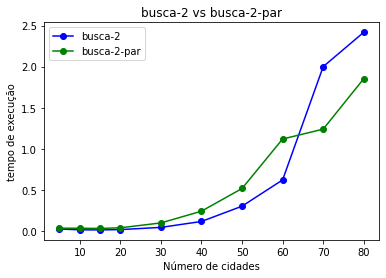

In [58]:
# x axis values
x = lista_num_cidades
# corresponding y axis values
y1 = lista_tempos_busca_2
y2 =  lista_tempos_busca_2_par
  
# plotting the points 
plt.plot(x, y1, 'bo-',label='busca-2')
plt.plot(x, y2, 'go-', label='busca-2-par')
plt.legend()
  
# naming the x axis
plt.xlabel('Número de cidades')
# naming the y axis
plt.ylabel('tempo de execução')
  
# giving a title to my graph
plt.title('busca-2 vs busca-2-par')
  
# function to show the plot
plt.show()

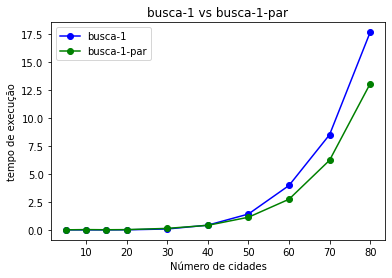

In [59]:
# x axis values
x = lista_num_cidades
# corresponding y axis values
y1 = lista_tempos_busca_1
y2 =  lista_tempos_busca_1_par
  
# plotting the points 
plt.plot(x, y1, 'bo-',label='busca-1')
plt.plot(x, y2, 'go-', label='busca-1-par')
plt.legend()
  
# naming the x axis
plt.xlabel('Número de cidades')
# naming the y axis
plt.ylabel('tempo de execução')
  
# giving a title to my graph
plt.title('busca-1 vs busca-1-par')
  
# function to show the plot
plt.show()

!!! question medium
    Com base em seu gráfico acima, responda a pergunta: "É possível usar paralelismo para tornar busca-local-1-par melhor que busca-local-2?"

**R** Não, como pode ser visto o busca-local-1-par dá cerca de 14ms, enquanto o busca-local-2 é aproximadamente 2,5 ms. Lei de Amdahl limita o mais rápido que pode ser.

Vamos agora generalizar a pergunta:

!!! question medium
    Dados dois algoritmos com complexidades computacionais diferentes, sendo que o primeiro é inferior ao segundo. É possível usar paralelismo para tornar o primeiro mais rápido que o segundo para todos tamanhos de entrada? Assuma que você possui um número fixo de *núcleos*. 




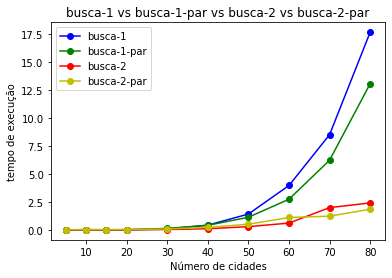

In [61]:
# x axis values
x = lista_num_cidades
# corresponding y axis values
y1 = lista_tempos_busca_1
y2 =  lista_tempos_busca_1_par
y3 = lista_tempos_busca_2
y4 = lista_tempos_busca_2_par
  
# plotting the points 
plt.plot(x, y1, 'bo-',label='busca-1')
plt.plot(x, y2, 'go-', label='busca-1-par')
plt.plot(x, y3, 'ro-',label='busca-2')
plt.plot(x, y4, 'yo-', label='busca-2-par')
plt.legend()
  
# naming the x axis
plt.xlabel('Número de cidades')
# naming the y axis
plt.ylabel('tempo de execução')
  
# giving a title to my graph
plt.title('busca-1 vs busca-1-par vs busca-2 vs busca-2-par')
  
# function to show the plot
plt.show()